<a href="https://colab.research.google.com/github/mrahimi14/datasets/blob/master/ParkinsonDataModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Loading the required packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Loading the datset:
myData = pd.read_csv('imputed_data.csv', index_col=0)

# Data Structure:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 791
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Outcome_y5          792 non-null    float64
 1   Outcome_y5_ordinal  792 non-null    float64
 2   Age                 792 non-null    float64
 3   sex                 792 non-null    float64
 4   Education           792 non-null    float64
 5   ABeta_std           792 non-null    float64
 6   Hb_std              792 non-null    float64
 7   NfL_S_std           792 non-null    float64
 8   aSyn_std            792 non-null    float64
 9   pTau_std            792 non-null    float64
 10  tTau_std            792 non-null    float64
 11  ABeta_log_sd        792 non-null    float64
 12  Hb_log_sd           792 non-null    float64
 13  NfL_S_log_sd        792 non-null    float64
 14  aSyn_log_sd         792 non-null    float64
 15  pTau_log_sd         792 non-null    float64
 16  tTau_log_sd  

In [6]:
# A subset of the main dataset (without the DEM level in the response variable)
myData_without_DEM = myData[myData['Outcome_y5_ordinal'] != 1]

# Remove Outcome_y5_ordinal column
myData_without_DEM.drop('Outcome_y5_ordinal', axis=1, inplace=True)

<ipython-input-6-b67ea0c5b151>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData_without_DEM.drop('Outcome_y5_ordinal', axis=1, inplace=True)


In [7]:
# Assuming myData_without_DEM is your pandas DataFrame

# Define the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(myData_without_DEM.drop('Outcome_y5', axis=1), myData_without_DEM['Outcome_y5'])

# Reconstruct the DataFrame
myData_final = pd.DataFrame(X_resampled, columns=myData_without_DEM.drop('Outcome_y5', axis=1).columns)
myData_final['Outcome_y5'] = y_resampled

# Omitting the `MoCA_Y0`:
myData_final.drop('MoCA_Y0', axis=1, inplace=True)

In [8]:
# Splitting the features and the response:
X = myData_final.drop('Outcome_y5', axis = 1)
y = myData_final['Outcome_y5']

In [9]:
# Train_Test_Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2332)

In [10]:
X_train.columns

Index(['Age', 'sex', 'Education', 'ABeta_std', 'Hb_std', 'NfL_S_std',
       'aSyn_std', 'pTau_std', 'tTau_std', 'ABeta_log_sd', 'Hb_log_sd',
       'NfL_S_log_sd', 'aSyn_log_sd', 'pTau_log_sd', 'tTau_log_sd',
       'ABeta_log', 'Hb_log', 'NfL_S_log', 'aSyn_log', 'pTau_log', 'tTau_log',
       'MoCA_Y1', 'MoCA_Y2', 'MoCA_Y3', 'MoCA_Y4', 'MoCA_Y5', 'BMI_B',
       'SBP_Sup_B', 'DBP_Sup_B', 'HR_Sup_B', 'SBP_Stn_B', 'DBP_Stn_B'],
      dtype='object')

Confusion Matrix:
[[180   0]
 [  3 184]]
Accuracy: 0.9918256130790191


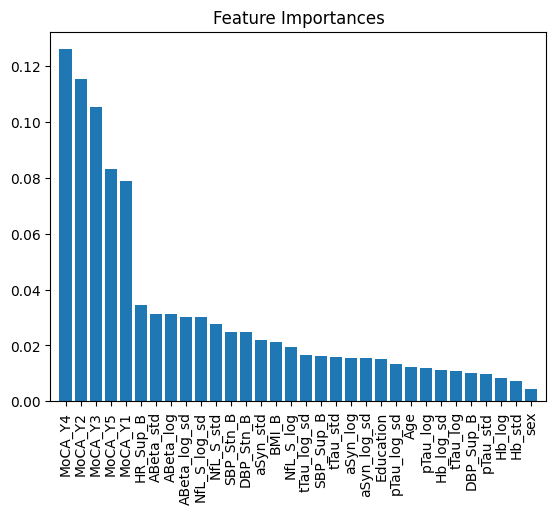

In [11]:
# Setting the Seed:
np.random.seed(2000)

# Assuming train_set_final and test_set_final are your training and testing datasets in pandas DataFrames

# Training the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Making predictions on the test set
pred_rf = rf_model.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred_rf)
accuracy = accuracy_score(y_test, pred_rf)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

# Assuming rf_model is your trained Random Forest model from the previous code snippet

# Calculating Variable Importance
importances = rf_model.feature_importances_

# Plotting Variable Importance
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Confusion Matrix:
[[180   0]
 [ 10 177]]
Accuracy: 0.9727520435967303


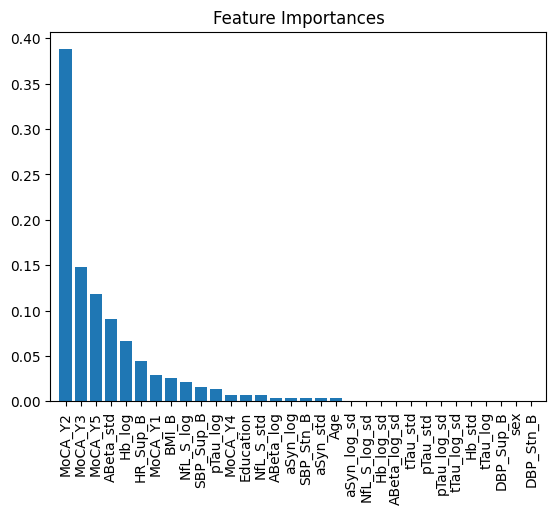

In [12]:
# Setting the Seed:
np.random.seed(2000)

# Assuming train_set_final and test_set_final are your training and testing datasets in pandas DataFrames

# Training the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Making predictions on the test set
pred_dt = dt_model.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred_dt)
accuracy = accuracy_score(y_test, pred_dt)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

# Calculating Variable Importance
importances = dt_model.feature_importances_

# Plotting Variable Importance
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Confusion Matrix:
[[177   3]
 [ 29 158]]
Accuracy: 0.9128065395095368


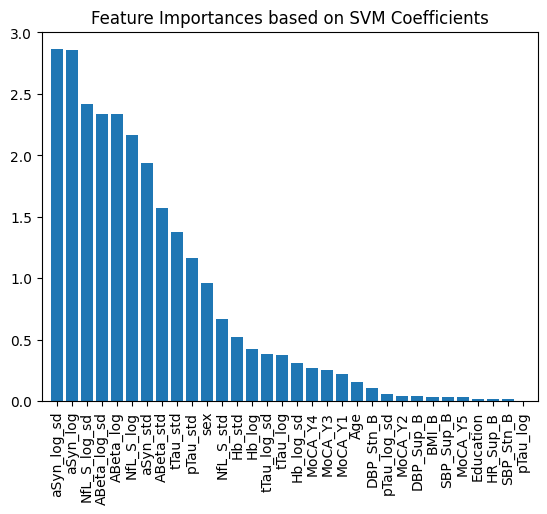

In [13]:
# Setting the Seed:
np.random.seed(2000)

# Assuming train_set_final and test_set_final are your training and testing datasets in pandas DataFrames

# Training the SVM model with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions on the test set
pred_svm = svm_model.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred_svm)
accuracy = accuracy_score(y_test, pred_svm)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

# Analyzing feature importance for SVM with linear kernel
coefficients = svm_model.coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1]

# Plotting feature importance based on coefficients
plt.figure()
plt.title("Feature Importances based on SVM Coefficients")
plt.bar(range(X_train.shape[1]), np.abs(coefficients)[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Confusion Matrix:
[[136  44]
 [ 30 157]]
Accuracy: 0.7983651226158038


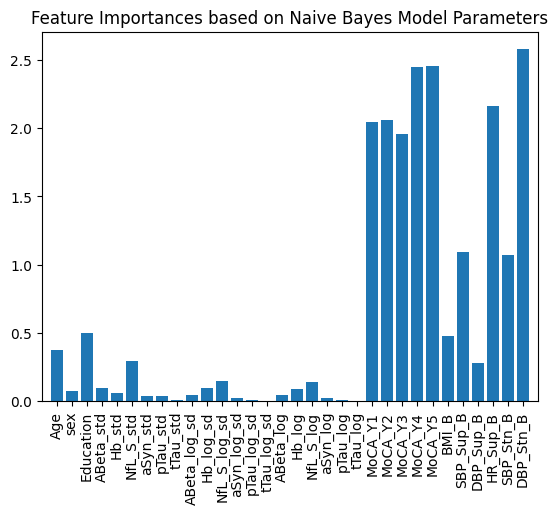

In [14]:
# Setting the Seed:
np.random.seed(2000)

# Assuming train_set_final and test_set_final are your training and testing datasets in pandas DataFrames

# Training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions on the test set
pred_nb = nb_model.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred_nb)
accuracy = accuracy_score(y_test, pred_nb)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

# Analyzing feature importance for Naive Bayes model
feature_importances = np.std(nb_model.theta_, axis=0)

# Plotting feature importance based on standard deviation of feature values
plt.figure()
plt.title("Feature Importances based on Naive Bayes Model Parameters")
plt.bar(range(X_train.shape[1]), feature_importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[172   8]
 [ 27 160]]
Accuracy: 0.9046321525885559


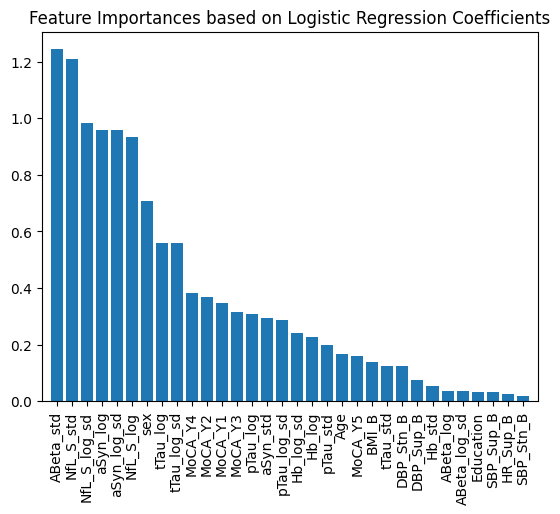

In [15]:
# Setting the Seed:
np.random.seed(2000)

# Assuming train_set_final and test_set_final are your training and testing datasets in pandas DataFrames

# Training the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
pred_lr = lr_model.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred_lr)
accuracy = accuracy_score(y_test, pred_lr)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

# Analyzing variable importance for Logistic Regression model
coefficients = np.abs(lr_model.coef_[0])
indices = np.argsort(coefficients)[::-1]

# Plotting variable importance based on coefficients
plt.figure()
plt.title("Feature Importances based on Logistic Regression Coefficients")
plt.bar(range(X_train.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [16]:
# Reshape the input data for RNN
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30
18/18 [==============================] - 3s 45ms/step - loss: 0.7023 - accuracy: 0.4959 - val_loss: 0.6744 - val_accuracy: 0.4905
Epoch 2/30
18/18 [==============================] - 0s 17ms/step - loss: 0.6741 - accuracy: 0.5578 - val_loss: 0.6600 - val_accuracy: 0.5940
Epoch 3/30
18/18 [==============================] - 0s 15ms/step - loss: 0.6736 - accuracy: 0.5751 - val_loss: 0.6999 - val_accuracy: 0.4905
Epoch 4/30
18/18 [==============================] - 0s 15ms/step - loss: 0.6961 - accuracy: 0.5523 - val_loss: 0.6793 - val_accuracy: 0.5232
Epoch 5/30
18/18 [==============================] - 0s 16ms/step - loss: 0.6788 - accuracy: 0.5505 - val_loss: 0.6628 - val_accuracy: 0.5804
Epoch 6/30
18/18 [==============================] - 0s 17ms/step - loss: 0.6691 - accuracy: 0.5896 - val_loss: 0.6584 - val_accuracy: 0.6458
Epoch 7/30
18/18 [==============================] - 0s 17ms/step - loss: 0.6675 - accuracy: 0.5842 - val_loss: 0.6548 - val_accuracy: 0.5995
Epoch 8/30
18

In [25]:
# Assuming you have already trained your model and obtained predictions
predictions = model.predict(X_test)
pred_rnn = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

12/12 [==============================] - 0s 8ms/step
Confusion Matrix:
[[180   0]
 [ 37 150]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       180
         1.0       1.00      0.80      0.89       187

    accuracy                           0.90       367
   macro avg       0.91      0.90      0.90       367
weighted avg       0.92      0.90      0.90       367



In [27]:
# Calculating the confusion matrix
cm_nb = confusion_matrix(y_test, pred_nb)
accuracy_nb = accuracy_score(y_test, pred_nb)

# Calculating sensitivity and specificity for Naive Bayes
tn_nb, fp_nb, fn_nb, tp_nb = cm_nb.ravel()
sensitivity_nb = tp_nb / (tp_nb + fn_nb)
specificity_nb = tn_nb / (tn_nb + fp_nb)

# Calculating the confusion matrix
cm_svm = confusion_matrix(y_test, pred_svm)
accuracy_svm = accuracy_score(y_test, pred_svm)

# Calculating sensitivity and specificity for SVM
tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

# Calculating the confusion matrix
cm_lr = confusion_matrix(y_test, pred_lr)
accuracy_lr = accuracy_score(y_test, pred_lr)

# Calculating sensitivity and specificity for Logistic Regression
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
sensitivity_lr = tp_lr / (tp_lr + fn_lr)
specificity_lr = tn_lr / (tn_lr + fp_lr)

# Calculating the confusion matrix
cm_dt = confusion_matrix(y_test, pred_dt)
accuracy_dt = accuracy_score(y_test, pred_dt)

# Calculating sensitivity and specificity for Decision Tree
tn_dt, fp_dt, fn_dt, tp_dt = cm_lr.ravel()
sensitivity_dt = tp_dt / (tp_dt + fn_dt)
specificity_dt = tn_dt / (tn_dt + fp_dt)


# Calculating the confusion matrix
cm_rf = confusion_matrix(y_test, pred_rf)
accuracy_rf = accuracy_score(y_test, pred_rf)

# Calculating sensitivity and specificity for Random Forest
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
sensitivity_rf = tp_rf / (tp_rf + fn_rf)
specificity_rf = tn_rf / (tn_rf + fp_rf)

# Calculating the confusion matrix
cm_rnn = confusion_matrix(y_test, pred_rnn)
accuracy_rnn = accuracy_score(y_test, pred_rnn)

# Calculating sensitivity and specificity for RNN
tn_rnn, fp_rnn, fn_rnn, tp_rnn = cm_rnn.ravel()
sensitivity_rnn = tp_rnn / (tp_rnn + fn_rnn)
specificity_rnn = tn_rnn / (tn_rnn + fp_rnn)



# Creating a DataFrame to display the results
data = {'Model': ['Naive Bayes', 'SVM with Linear Kernel', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'RNN'],
        'Accuracy': [accuracy_nb, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_rf, accuracy_rnn],
        'Sensitivity': [sensitivity_nb, sensitivity_svm, sensitivity_lr, sensitivity_dt, sensitivity_rf, sensitivity_rnn],
        'Specificity': [specificity_nb, specificity_svm, specificity_lr, specificity_dt, specificity_rf, specificity_rnn]}

results_df = pd.DataFrame(data)
results_df.sort_values(by = ['Accuracy', 'Sensitivity', 'Specificity'], ascending=False)
# print(results_df)


,Model,Accuracy,Sensitivity,Specificity
4,Random Forest,0.991826,0.983957,1.000000
3,Decision Tree,0.972752,0.855615,0.955556
1,SVM with Linear Kernel,0.912807,0.844920,0.983333
2,Logistic Regression,0.904632,0.855615,0.955556
5,RNN,0.899183,0.802139,1.000000
0,Naive Bayes,0.798365,0.839572,0.755556
